# TikTok Video Classification: Claim vs. Opinion
## Task Description
The task at hand involves classifying TikTok videos into two categories: "Claim" and "Opinion." A successful machine learning model will be capable of automatically identifying whether a given video makes a factual claim or merely expresses an opinion. This distinction is crucial for TikTok's content moderation efforts and can significantly enhance the overall user experience on the platform.

## Methodology
- Random Forest Algorithm: I utilize the Random Forest algorithm due to its ability to handle high-dimensional data, maintain low bias, and offer good generalization performance. The ensemble approach of Random Forest helps in enhancing predictive accuracy and mitigating overfitting.

- GridSearch for Hyperparameter Estimation: GridSearch is used to systematically explore various hyperparameter combinations and identify the optimal set of hyperparameters for the Random Forest model. This process helps fine-tune the model and achieve better performance.

- Tokenize Text Technique: In order to transform textual information within the videos into numerical features, I employ the Tokenize Text technique. By converting the text data into a suitable format for machine learning algorithms, I can effectively include textual information in the model training process.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier

In [5]:
df = pd.read_csv('tiktok_dataset.csv')
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [6]:
df.shape

(19382, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [8]:
df.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [9]:
df = df.dropna(axis = 0).reset_index(drop = True)

In [10]:
df['claim_status'].value_counts(normalize = True)*100

claim      50.345839
opinion    49.654161
Name: claim_status, dtype: float64

# Feature engineering

Extract the length of each video_transcription_text

In [11]:
df['text_length'] = df['video_transcription_text'].str.len()
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


In [12]:
df.groupby(by = ['claim_status'])['text_length'].mean()

claim_status
claim      95.376978
opinion    82.722562
Name: text_length, dtype: float64

## Encode target and catgorical variables.

In [13]:
df['verified_status'].unique()

array(['not verified', 'verified'], dtype=object)

In [14]:
df['author_ban_status'].unique()

array(['under review', 'active', 'banned'], dtype=object)

In [15]:
df_encoded = df.drop(columns = ['#', 'video_id'])
df_encoded['claim_status'] = np.where(df_encoded['claim_status'] == 'claim', 1, 0)
df_encoded = pd.get_dummies(df_encoded, columns = ['verified_status','author_ban_status'], drop_first = True)
df_encoded.head()

,claim_status,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,0,0,1
1,1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,0,0,0
2,1,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,0,0,0
3,1,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,0,0,0
4,1,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,0,0,0


## Tokenize transcript column

In [16]:
count_vec = CountVectorizer(ngram_range = (2,3),
                           max_features = 15,
                           stop_words = 'english')
count_vec

CountVectorizer(max_features=15, ngram_range=(2, 3), stop_words='english')

In [17]:
count = count_vec.fit_transform(df_encoded['video_transcription_text']).toarray()
count_df = pd.DataFrame(data = count, columns = count_vec.get_feature_names_out())
df_final = pd.concat([df_encoded.drop(columns = ['video_transcription_text']).reset_index(drop = True), count_df], axis = 1)
df_final.head()

,claim_status,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,...,friend read,internet forum,learned media,learned news,media claim,news claim,point view,read media,social media,willing wager
0,1,59,343296.0,19425.0,241.0,1.0,0.0,97,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,32,140877.0,77355.0,19034.0,1161.0,684.0,107,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,31,902185.0,97690.0,2858.0,833.0,329.0,137,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,25,437506.0,239954.0,34812.0,1234.0,584.0,131,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,19,56167.0,34987.0,4110.0,547.0,152.0,128,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df_final.dtypes

claim_status                        int32
video_duration_sec                  int64
video_view_count                  float64
video_like_count                  float64
video_share_count                 float64
video_download_count              float64
video_comment_count               float64
text_length                         int64
verified_status_verified            uint8
author_ban_status_banned            uint8
author_ban_status_under review      uint8
colleague discovered                int64
colleague learned                   int64
colleague read                      int64
discussion board                    int64
friend learned                      int64
friend read                         int64
internet forum                      int64
learned media                       int64
learned news                        int64
media claim                         int64
news claim                          int64
point view                          int64
read media                        

In [19]:
y = df_final['claim_status']
x = df_final.drop(columns = ['claim_status'])

In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((15267, 25), (3817, 25), (15267,), (3817,))

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall

In [21]:
rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [5, 7, None],
             'max_features': [0.3, 0.6],
             'max_samples': [0.7],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [75,100,200],
             }

scoring = {'accuracy', 'precision', 'recall', 'f1'}

rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')

In [22]:
%%time
rf_cv.fit(xtrain, ytrain)

CPU times: total: 9min 19s
Wall time: 14min 38s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall', scoring={'accuracy', 'f1', 'precision', 'recall'})

In [23]:
rf_cv.best_score_

0.9959635416666666

In [24]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 75}

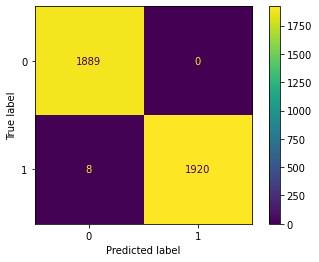

In [25]:
y_pred = rf_cv.best_estimator_.predict(xtest)
y_pred

cm = confusion_matrix(ytest, y_pred)
cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                                display_labels = rf_cv.classes_)
cm_disp.plot()
plt.show()

In [26]:
target_labels = ['opinion','claim']
print(classification_report(ytest, y_pred, target_names = target_labels))

              precision    recall  f1-score   support

     opinion       1.00      1.00      1.00      1889
       claim       1.00      1.00      1.00      1928

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



Text(0, 0.5, 'Mean decreas in Impurity')

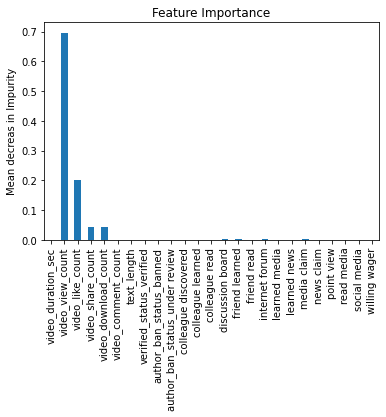

In [27]:
importance = rf_cv.best_estimator_.feature_importances_
rf_importance = pd.Series(importance, index = xtrain.columns)

fig, ax = plt.subplots()
rf_importance.plot.bar(ax = ax)
ax.set_title('Feature Importance')
ax.set_ylabel('Mean decreas in Impurity')

This notebook successfully classifies TikTok videos into two categories: "Claim" and "Opinion" using the Random Forest algorithm. The model achieved exceptional accuracy, precision, recall, and F1-score for both classes. Incorporating GridSearch and Tokenize Text techniques further improved its performance.